In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import create_report
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [31]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [33]:
species = df['Species'].value_counts()
species

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

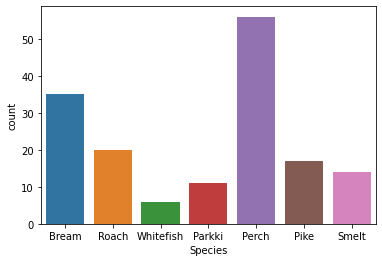

In [34]:
sns.countplot(x=df['Species'],data=df)
plt.show()

### **Correlation**

<AxesSubplot:>

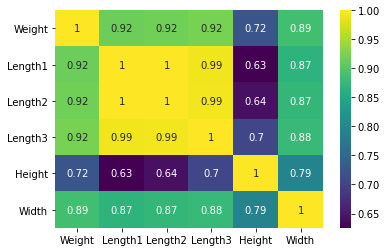

In [35]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')

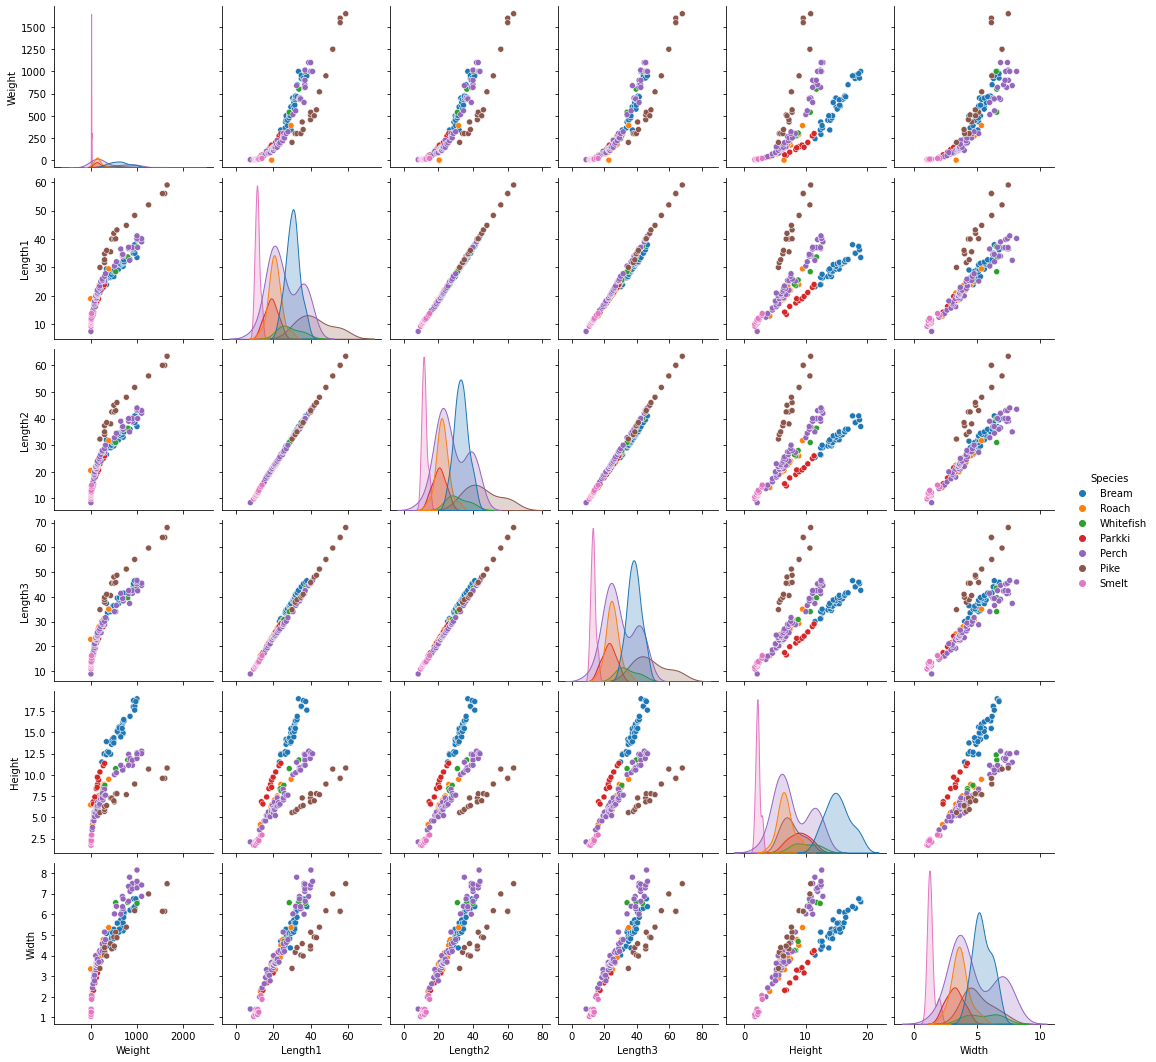

In [36]:
sns.pairplot(df,kind='scatter',hue='Species')

In [37]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


### **Dealing with Outliers**

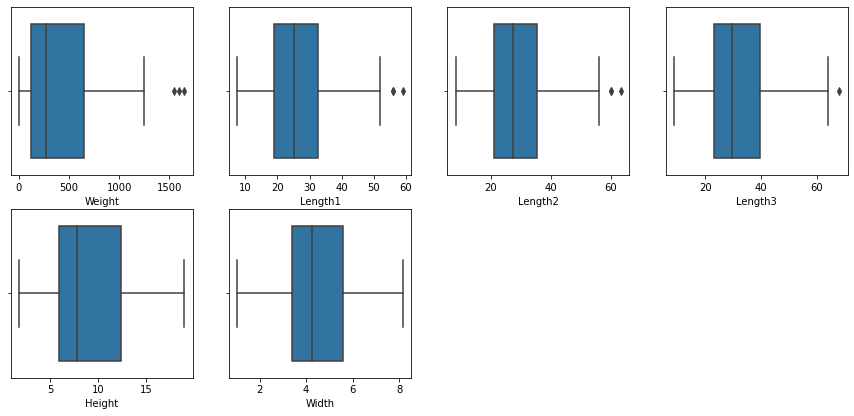

In [38]:
col_dict = {'Weight':1,'Length1':2,'Length2':3,'Length3':4,'Height':5,'Width':6}

plt.figure(figsize=(15,18))

for x,i in col_dict.items():
    plt.subplot(5,4,i)
    sns.boxplot(x=df[x])
    
plt.show()

### We can see that there are some potential outliers from the above boxplot. To remove outliers, i will use the Interquartile range (IQR) method.

In [39]:
features = ['Weight','Length1','Length2','Length3']

for x in features:
    p25 = df[x].quantile(0.25)
    p75 = df[x].quantile(0.75)
    iqr = p75-p25
    
    upper = p75 + 1.5 * iqr
    lower = p25 - 1.5 * iqr
    
    df = df[(df[x] > lower) & (df[x] < upper)]
    

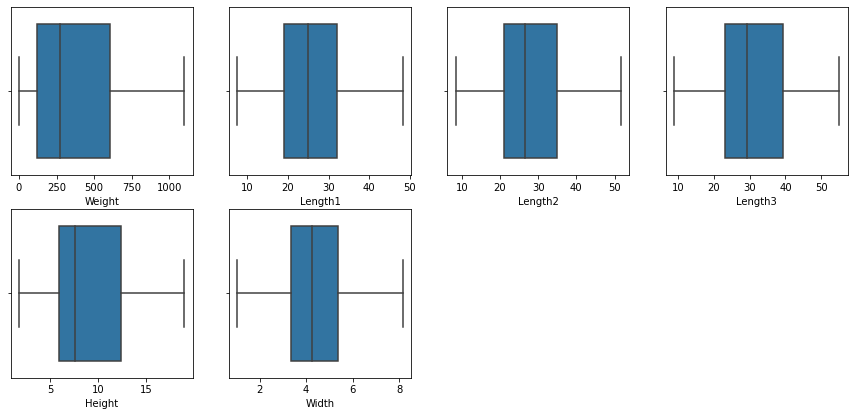

In [40]:
plt.figure(figsize=(15,18))

for x,i in col_dict.items():
    plt.subplot(5,4,i)
    sns.boxplot(x=df[x])
    
plt.show()

In [41]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Weight,155.0,369.573548,312.685376,0.0000,120.00000,270.0000,605.0000,1100.000
Length1,155.0,25.485806,8.897865,7.5000,19.00000,25.0000,32.0000,48.300
Length2,155.0,27.604516,9.555969,8.4000,21.00000,26.5000,35.0000,51.700
Length3,155.0,30.383226,10.468442,8.8000,22.95000,29.2000,39.3500,55.100
Height,155.0,8.939934,4.336074,1.7284,5.92695,7.6156,12.3793,18.957
Width,155.0,4.358886,1.664295,1.0476,3.36360,4.2390,5.3732,8.142


### **Preparing for the linear model**

In [42]:
# Target
y = df['Weight']
# Independant variables
X = df.iloc[:,2:7]

### Dividing dataset to train and test

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
print('X_train: ',np.shape(X_train))
print('y_train: ',np.shape(y_train))
print('X_test: ',np.shape(X_test))
print('y_test: ',np.shape(y_test))

X_train:  (124, 5)
y_train:  (124,)
X_test:  (31, 5)
y_test:  (31,)


In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
predictors = X.columns
target = 'Weight'

print(f'Intercept: {model.intercept_:.3f}')
print('Coefficients:')

for x, coef in zip(predictors,model.coef_):
    print(f'{x}: {coef}')
    

Intercept: -406.564
Coefficients:
Length1: 115.3075752829231
Length2: -58.392441180015695
Length3: -37.9425292548593
Height: 35.65621184400301
Width: 64.74544731928945


In [50]:
model_sm = sm.OLS(y_train, X_train.assign(const=1))
results = model_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                      0.9129
Model:                            OLS   Adj. R-squared:                 0.9092
Method:                 Least Squares   F-statistic:                     247.5
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          8.703e-61
Time:                        22:15:00   Log-Likelihood:                -735.59
No. Observations:                 124   AIC:                             1483.
Df Residuals:                     118   BIC:                             1500.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Length1      115.3076     35.197      3.276      0.0

### **Predictions using the model**

### **Predict Weight from Train dataset**

In [51]:
y_head = model.predict(X_train)
r2_score(y_train,y_head)

0.9129319571904924

### I set random_state=1 as the first time, but if we change this, our train and test samples will be different and also the score. To get rid of this, I will use k-fold cross validation with k=10.

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(model,X_train,y_train,cv=10,scoring='r2')
print(cross_val_score_train)

[0.90024921 0.85843181 0.91191199 0.94766073 0.95061398 0.8692874
 0.90730626 0.85439811 0.78959602 0.84930107]


In [53]:
cross_val_score_train.mean()

0.8838756574617334

### **Using trained model and test dataset**

In [54]:
y_pred = model.predict(X_test)
print(r2_score(y_test,y_pred))

0.8797971798477667


### **Visualize the predictions**

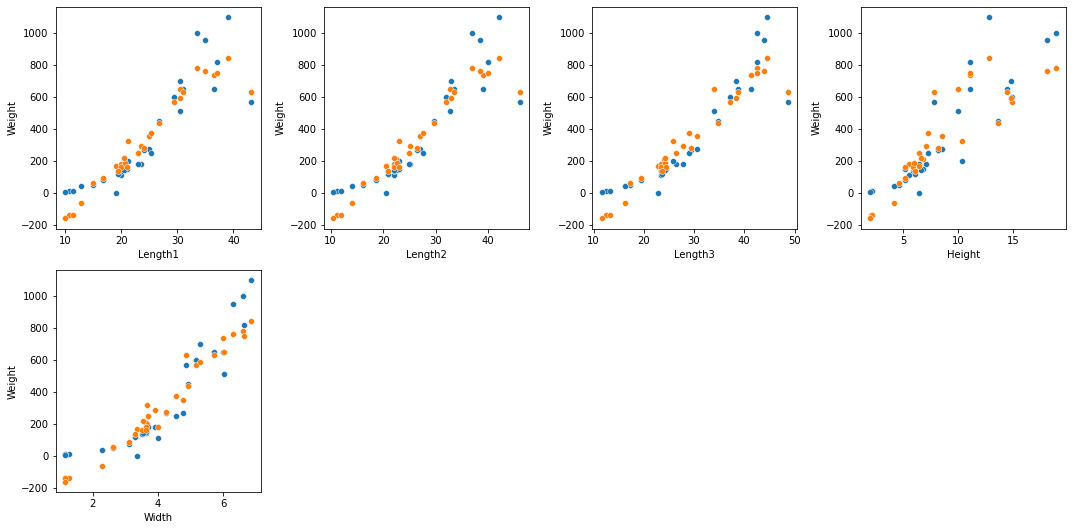

In [61]:
pred_dict = {'Length1':1,'Length2':2,'Length3':3,'Height':4,'Width':5}

plt.figure(figsize=(15,18))

for x,i in pred_dict.items():
    plt.subplot(5,4,i)
    sns.scatterplot(x=X_test[x],y=y_test)
    sns.scatterplot(x=X_test[x],y=y_pred)

plt.tight_layout()
plt.show()


### **Comparing real and predicted weights**

In [62]:
y_pred1 = pd.DataFrame(y_pred, columns=['Predicted Weight'])
y_pred1.head()

,Predicted Weight
0,739.792027
1,58.611843
2,290.185278
3,763.805709
4,-62.383000


In [63]:
y_test1 = pd.DataFrame(y_test)
y_test1 = y_test1.reset_index(drop=True)
y_test1.head()

,Weight
0,650.0
1,51.5
2,180.0
3,955.0
4,40.0


In [65]:
new_df = pd.concat([y_test1,y_pred1],axis=1)
new_df['Deviance'] = new_df['Predicted Weight'] - new_df['Weight']
new_df

,Weight,Predicted Weight,Deviance
0,650.0,739.792027,89.792027
1,51.5,58.611843,7.111843
2,180.0,290.185278,110.185278
3,955.0,763.805709,-191.194291
4,40.0,-62.383000,-102.383000
5,0.0,170.026721,170.026721
6,600.0,571.461078,-28.538922
7,514.0,652.268445,138.268445
8,272.0,353.058923,81.058923
9,9.8,-140.284185,-150.084185
